# 1. pandas-datareader
## stooq로 주가 지수 데이터 수집

In [1]:
pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas_datareader.data as web
import seaborn as sns  

In [2]:
df = web.DataReader('^KOSPI', 'stooq')
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-15,2469.80,2478.14,2455.99,2476.51,447771000
2023-05-12,2487.35,2487.35,2472.45,2475.42,798230000
2023-05-11,2505.57,2513.82,2490.08,2491.00,648134000
2023-05-10,2505.96,2510.13,2488.42,2496.51,635635000
2023-05-09,2512.34,2514.81,2495.63,2510.06,751647000
...,...,...,...,...,...
2018-05-24,2477.48,2481.31,2459.65,2466.01,638125000
2018-05-23,2462.98,2476.32,2460.07,2471.91,752675000
2018-05-21,2464.07,2471.66,2448.01,2465.57,588088000


<AxesSubplot:xlabel='Date', ylabel='Close'>

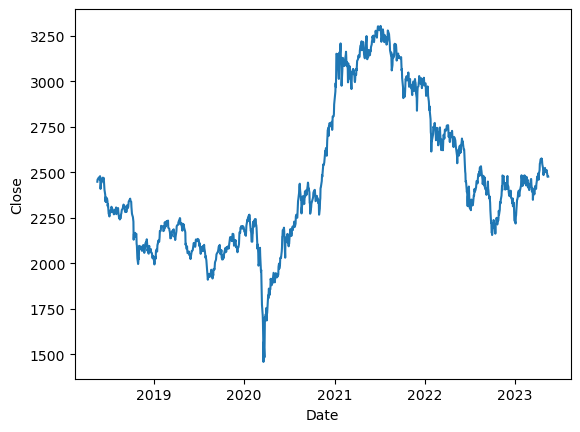

In [3]:
sns.lineplot(x=df.index, y="Close", data=df)

## FRED에서 원자재 가격 데이터 수집

In [4]:
import datetime

In [5]:
start = datetime.datetime(2018, 1,1) #start 지정안하면 4년치
#end도 지정가능

In [6]:
oil = web.DataReader('DCOILWTICO', 'fred', start)

In [7]:
oil

,DCOILWTICO
DATE,
2018-01-01,NaN
2018-01-02,60.37
2018-01-03,61.61
2018-01-04,61.98
2018-01-05,61.49
...,...
2023-05-02,71.71
2023-05-03,68.62
2023-05-04,68.52


In [8]:
oil.isnull().sum()

DCOILWTICO    56
dtype: int64

In [10]:
oil = oil.dropna()
oil

,DCOILWTICO
DATE,
2018-01-02,60.37
2018-01-03,61.61
2018-01-04,61.98
2018-01-05,61.49
2018-01-08,61.73
...,...
2023-05-02,71.71
2023-05-03,68.62
2023-05-04,68.52


## Alpha Vantage 에서 환율 데이터_api_key 필요

In [11]:
alphavantage_key = ' JW05102F08IASIY8'

### 일별 환율 데이터

In [12]:
df1 = web.DataReader("USD/KRW", "av-forex-daily", api_key = alphavantage_key)

In [13]:
df1

,open,high,low,close
2014-11-24,1110.94,1117.92,1110.41,1116.00
2014-11-25,1116.00,1116.00,1108.80,1110.85
2014-11-26,1110.85,1110.85,1102.62,1106.35
2014-11-27,1106.35,1106.35,1096.50,1101.00
2014-11-28,1102.10,1113.06,1101.00,1109.70
...,...,...,...,...
2023-05-10,1325.13,1326.03,1315.85,1315.85
2023-05-11,1315.52,1333.99,1315.04,1329.32
2023-05-12,1336.10,1342.46,1333.30,1342.39
2023-05-15,1340.65,1342.07,1333.42,1334.24


### 실시간 환율

In [14]:
df2 = web.DataReader("USD/KRW", "av-forex", api_key = alphavantage_key)
df2

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1337.06000000
Last Refreshed,2023-05-16 07:16:44
Time Zone,UTC
Bid Price,1337.05000000
Ask Price,1337.09600000


# 2. FinanceDataReader_국내 주식 데이터

In [16]:
!pip install finance-datareader

# * 미국 주식 개별종목 일자별 가격
# * 한국거래소 개별종목 일자별 가격
# * 각종 지수 데이터: 코스피, 코스닥, 다우, 나스닥, S&P 500
# * 환율 데이터: USD/KRX (원달러), USD/EUR, CNY/KRW
# * 암호화폐 가격: BTC/USD (Bitfinex), BTC/KRW (빗썸)
# * 한국 거래소 종목코드 리스팅: KRX (KOSPI, KODAQ, KONEX)
# * 미국 주식 종목코드 리스팅: NASDAQ, NYSE, AMEX, S&P 500 종목

In [17]:
import FinanceDataReader as fdr

In [18]:
samsung = fdr.DataReader('005930')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-01-29,1790,1806,1753,1759,510570,NaN
1999-02-01,1800,1800,1763,1788,238890,0.016487
1999-02-02,1788,1788,1739,1747,315480,-0.022931
1999-02-03,1718,1731,1684,1693,342576,-0.030910
1999-02-04,1702,1712,1663,1702,363810,0.005316
...,...,...,...,...,...,...
2023-05-10,65500,65500,64300,64600,13057727,-0.010720
2023-05-11,64700,65100,64200,64200,11648905,-0.006192
2023-05-12,63700,64600,63600,64100,8693913,-0.001558


In [25]:
usd_krw = fdr.DataReader('USD/KRW', '2013-01-01')

In [26]:
usd_krw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1062.500000,1064.500000,1061.640015,1062.500000,1062.500000,0.0
2013-01-02,1062.599976,1064.800049,1061.500000,1062.500000,1062.500000,0.0
2013-01-03,1062.400024,1063.800049,1059.199951,1062.599976,1062.599976,0.0
2013-01-04,1062.000000,1064.199951,1060.750000,1061.900024,1061.900024,0.0
2013-01-07,1055.000000,1063.900024,1033.000000,1033.099976,1033.099976,0.0
...,...,...,...,...,...,...
2023-05-10,1326.050049,1326.050049,1315.829956,1326.050049,1326.050049,0.0
2023-05-11,1318.050049,1333.729980,1315.780029,1318.050049,1318.050049,0.0
2023-05-12,1329.880005,1341.459961,1329.800049,1329.880005,1329.880005,0.0


<AxesSubplot:xlabel='Date'>

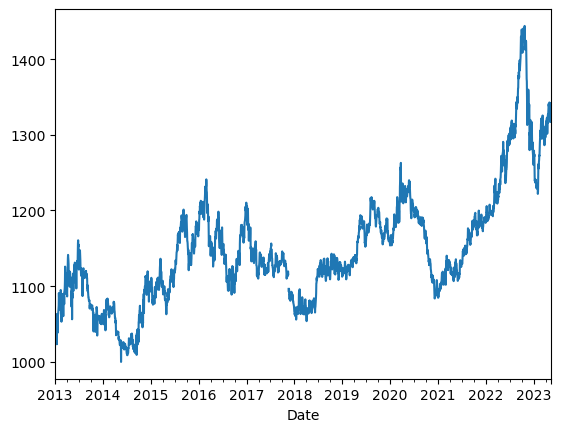

In [27]:
usd_krw['Close'].plot()